In [2]:
import numpy as np
import random
import itertools
from tqdm import tqdm
from IPython.display import Image

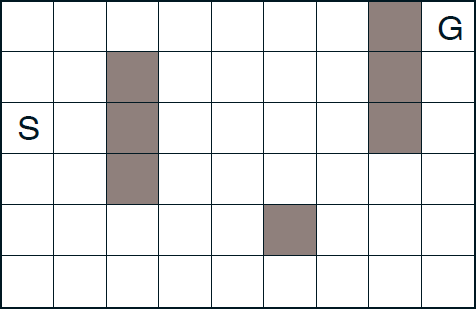

In [3]:
Image("maze.png")

In [7]:
class env():
    def __init__(self):
        self.start = [2, 0]
        self.goal = [0, 8]
        self.walls = [[1, 2], [2, 2], [3, 2], [4, 5], [0, 7], [1, 7], [2, 7]]
        self.q = np.zeros((6, 9, 4))
        self.n = np.zeros((6, 9, 4))

    def step(self, s, a):
        # a = 0, 1, 2, 3 (w, n, e, s).
        if a == 0:
            s[1] = max(0, s[1] - 1)
            if s in self.walls:
                s[1] += 1
        elif a == 1:
            s[0] = max(0, s[0] - 1)
            if s in self.walls:
                s[0] += 1
        elif a == 2:
            s[1] = min(8, s[1] + 1)
            if s in self.walls:
                s[1] -= 1
        elif a == 3:
            s[0] = min(5, s[0] + 1)
            if s in self.walls:
                s[0] -= 1
        return s
    
    def reward(self, s, a):
        if (s == [1, 8]) and (a == 1):
            return 1
        else:
            return -0.1
    
    def sampling(self, epsilon):
        s_ls = []
        a_ls = []
        r_ls = []
        n = 0
        s = self.start.copy() 
        while s != self.goal:
            random_step = random.random() < epsilon
            s_ls.append(s.copy())
            if random_step:
                a = random.randint(0, 3)
            else:
                qa = self.q[s[0], s[1]]
                top_a = np.argwhere(qa == np.max(qa)).flatten()
                a = top_a[0] if len(top_a) == 1 else random.randint(0, 3)
            a_ls.append(a)
            r_ls.append(self.reward(s, a))
            s = self.step(s, a)
            n += 1
        return s_ls, a_ls, r_ls, n

    def glie(self, n_iter, gamma=0.9):
        k = 0
        for _ in tqdm(range(n_iter)):
            epsilon = max(0.999 ** k, 0.01)
            s_ls, a_ls, r_ls, n = self.sampling(epsilon) 
            for i in range(n):
                g = 0
                for j in range(n - i):
                    g += gamma ** j * r_ls[i + j]
                s = s_ls[i]
                a = a_ls[i]
                self.n[s[0], s[1], a] += 1 
                self.q[s[0], s[1], a] += (g - self.q[s[0], s[1], a]) / self.n[s[0], s[1], a]
            k += 1
        return self.q

In [8]:
e = env()
v = e.glie(10000)

100%|██████████| 10000/10000 [00:05<00:00, 1732.97it/s]


In [9]:
print(np.argmax(v, axis=2))

[[2 2 2 2 3 2 3 0 0]
 [1 1 0 2 3 3 3 0 1]
 [3 1 0 2 2 3 3 0 1]
 [3 3 0 2 2 2 2 2 1]
 [2 2 2 2 3 0 2 2 1]
 [2 2 2 2 2 2 1 2 1]]
